In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [209]:
# Replace with your dataset path
df = pd.read_csv("loan_approval_dataset.csv")

print(df.head())


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [211]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns

# Impute missing values
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_num = SimpleImputer(strategy="mean")

df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])


In [213]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [215]:
target_column = ' loan_status'  # Matches the column name in the dataset
try:
    X = df.drop(target_column, axis=1)
    y = df[target_column]
except KeyError:
    print(f"Error: The column '{target_column}' was not found. Please check the column names above and update the target_column variable.")
    raise

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [219]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [221]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [223]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_sm, y_train_sm)
y_pred_tree = tree_model.predict(X_test)

Logistic Regression Results:
[[460  71]
 [ 88 235]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       531
           1       0.77      0.73      0.75       323

    accuracy                           0.81       854
   macro avg       0.80      0.80      0.80       854
weighted avg       0.81      0.81      0.81       854

Decision Tree Results:
[[527   4]
 [ 13 310]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.99      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



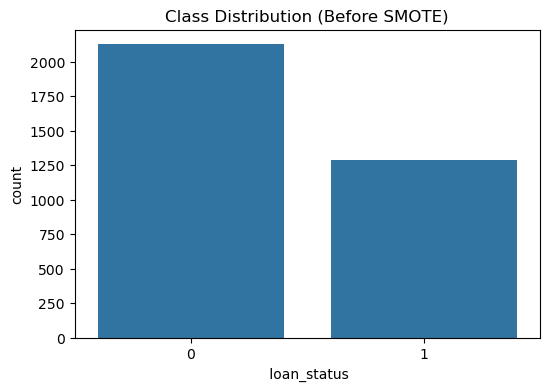

In [227]:
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution (Before SMOTE)")
plt.show()

In [229]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


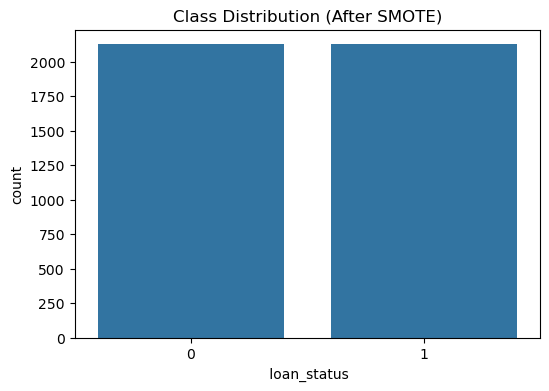

In [231]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_sm)
plt.title("Class Distribution (After SMOTE)")
plt.show()

In [233]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_train_sm_pca = pca.fit_transform(X_train_sm)

plt.figure(figsize=(12,5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

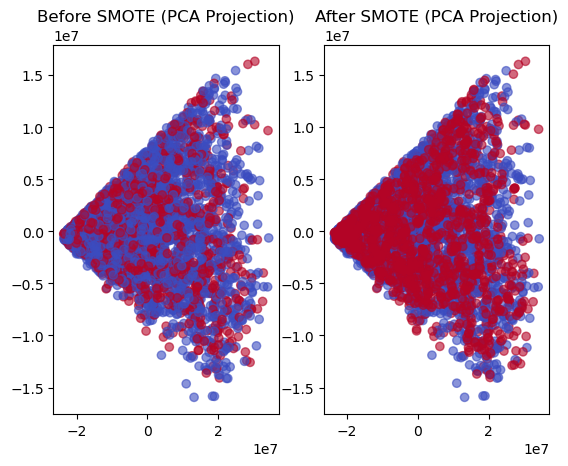

In [235]:
# Before SMOTE
plt.subplot(1,2,1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="coolwarm", alpha=0.6)
plt.title("Before SMOTE (PCA Projection)")

# After SMOTE
plt.subplot(1,2,2)
plt.scatter(X_train_sm_pca[:,0], X_train_sm_pca[:,1], c=y_train_sm, cmap="coolwarm", alpha=0.6)
plt.title("After SMOTE (PCA Projection)")

plt.show()